## Final Project Submission

Please fill out:
* Student name: Sophia Mbataru
* Student pace: Full time
* Scheduled project review date/time: 30/09/2022
* Instructor name: Lucille, Antonny, William, Nikita
* Blog post URL: NIL


# Analysis and Prediction of House Sales in King County, USA

# Business Understanding

   King County is a county located in the U.S. state of Washington. most populous county in Washington, and the 13th-most populous in the United States thus explaining the housing crisis in the region. the houses in King County comprises of a variety of features, for example, bedrooms, bathrooms/bedroom, area of the house and lot, presence of a waterfront, views, condition of the house, grade assigned by the county, built year, renovated year and the location of the house. 
    The house prices and its spatial distribution are important for stakeholders in the real estate business particularly in metropolitan areas. Stakeholders, such as, external customers looking to purchase or sell a house in King County, they would require to decide on the house to choose based on the variety of parameters associated with the house prices. The objective of the study is to use statistical analysis to find the dependence of these variables on the price of houses, and which parameters affect the housing prices and which variables have minimal affect on the price of houses. The statistical tools used are, Correlation and Regression. Insights between the variables are drawn from scatter plots, and histogram .


Null Hypothesis; There is no relationship between the chosen independent variables and the target variable.

Alternate Hypothesis; There is a relationship between the chosen independent variables and the target variable.



# Data Understanding
The dataset we have taken is House sales in King County, which can be found in kc_house_data.csv in the data folder. The data contains the prices of houses against a variety of parameters. 


In [1]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures


## Importing the Data


In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
#preview the data
df.tail(20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21577,8672200110,3/17/2015,1090000.0,5,3.75,4170,8142,2.0,NO,AVERAGE,...,10 Very Good,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,...,8 Good,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21579,1972201967,10/31/2014,520000.0,2,2.25,1530,981,3.0,NO,NONE,...,8 Good,1480,50.0,2006,NaN,98103,47.6533,-122.346,1530,1282
21580,7502800100,8/13/2014,679950.0,5,2.75,3600,9437,2.0,NO,NONE,...,9 Better,3600,0.0,2014,0.0,98059,47.4822,-122.131,3550,9421
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,NO,NONE,...,10 Very Good,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,AVERAGE,...,9 Better,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21583,7202300110,9/15/2014,810000.0,4,3.00,3990,7838,2.0,NO,NONE,...,9 Better,3990,0.0,2003,NaN,98053,47.6857,-122.046,3370,6814
21584,249000205,10/15/2014,1540000.0,5,3.75,4470,8088,2.0,NO,NONE,...,11 Excellent,4470,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964
21585,5100403806,4/7/2015,467000.0,3,2.50,1425,1179,3.0,NO,NONE,...,8 Good,1425,0.0,2008,0.0,98125,47.6963,-122.318,1285,1253
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,...,6 Low Average,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303


# Data Preparation

In [4]:
#Clean the data
#Let's drop columns that are not essential to our analysis

df.drop(["zipcode", "id", "date", "lat", "long", "yr_built", "sqft_basement", "yr_renovated"], axis = 1, inplace = True)


### Missing values

In [5]:
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
waterfront_null = (sum(df['waterfront'].isnull())/len(df['waterfront'])) * 100 
view_null = (sum(df['view'].isnull())/len(df['view'])) * 100 

print(f'The proportion of missing values in the column waterfront is {waterfront_null} %')
print(f'The proportion of missing values in the column view is {view_null} %')


The proportion of missing values in the column waterfront is 11.00152798999861 %
The proportion of missing values in the column view is 0.29170718155299347 %


Those are small percentages of missing values so I choose to drop the missing rows.

In [7]:
#handling missing values in column waterfront

#df['waterfront'].replace(['YES', 'NO'], [1, 0], inplace = True)

#fill the missing values in the column with 0 to indicate 'no waterfront'
#df['waterfront'].fillna(0, inplace = True)
df.dropna(subset = ['waterfront'], inplace = True)
df.dropna(subset = ['view'], inplace = True)


In [8]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing values, we proceed:

### Outliers

count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3 

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

The above code treats any value that’s more than 3 standard deviations away from the mean as an outlier, and drops all the rows containing outliers.

In [9]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19164 non-null  float64
 1   bedrooms       19164 non-null  int64  
 2   bathrooms      19164 non-null  float64
 3   sqft_living    19164 non-null  int64  
 4   sqft_lot       19164 non-null  int64  
 5   floors         19164 non-null  float64
 6   waterfront     19164 non-null  object 
 7   view           19164 non-null  object 
 8   condition      19164 non-null  object 
 9   grade          19164 non-null  object 
 10  sqft_above     19164 non-null  int64  
 11  sqft_living15  19164 non-null  int64  
 12  sqft_lot15     19164 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 2.0+ MB


There is presence of categorical data i.e. grade, condition and view.

### Prepare the categorical features for multiple regression modeling

Let's identify a promising predictor from the categorical features

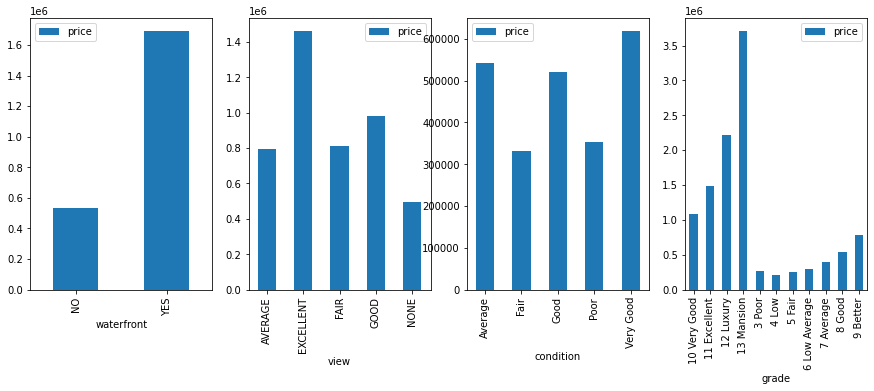

In [10]:
#plot the categorical features against price to determine the best predictor among them.
categorical_features = df.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(15,5))

for index, feature in enumerate(categorical_features):
    df.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

Waterfront, view and condition are good categorical predictor columns to use in the model. 

### Setting up variables for regression
Let's look at correlations between the other variables and `price`:

In [11]:
df.corr()["price"]

price            1.000000
bedrooms         0.309057
bathrooms        0.526609
sqft_living      0.704428
sqft_lot         0.087430
floors           0.258797
sqft_above       0.609611
sqft_living15    0.582450
sqft_lot15       0.081562
Name: price, dtype: float64

Since correlation is a measure related to regression modeling, we can see that there seems to be some features that have medium-to-strong correlations with price. These features are sqft_living, grade,sqft_above, sqft_living15, and bathrooms.

The feature sqft_living has the strongest correlations, let's build a simple linear regression model and work with that as the baseline for our multiple linear regression model.

# Modeling

In [12]:
y = df['price'] #Our target variable
baseline_model = sm.OLS(y, sm.add_constant(df['sqft_living'])).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:58:11   Log-Likelihood:            -2.6638e+05
No. Observations:               19164   AIC:                         5.328e+05
Df Residuals:                   19162   BIC:                         5.328e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -4.86e+04   4697.110    -10.348      

### Simple Linear Regression Results
The model is statistically significant overall, with an F-statistic p-value well below 0.05.
The model explains about 50% of the variance in price.
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
If a house had a square foot of 0, we would expect price to be about -4.86e+04
For each increase of 1 house square foot, we see an associated increase in price of about 283.4016 


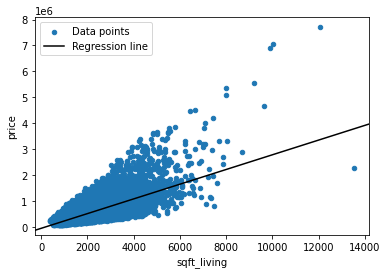

In [13]:
figfig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_model, label="Regression line", ax=ax, color="black")
ax.legend();

And the residuals:

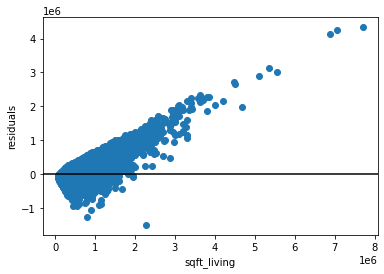

In [14]:
fig, ax = plt.subplots()

ax.scatter(df["price"], baseline_model.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

### Multiple Regression with Many Features 

These additional features are grade, sqft_above, sqft_living15, bathrooms


In [15]:
#create an overall variable called (X_all) that contains the independent variables
#with the highest correlation with price for analysis
# drop price because this is our target, then only select numeric features

df_subset = df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'floors', 'bedrooms', 'bathrooms']].copy()
X_all = df_subset.drop("price", axis=1).select_dtypes("number")
X_all

,sqft_living,sqft_above,sqft_living15,sqft_lot,sqft_lot15,floors,bedrooms,bathrooms
1,2570,2170,1690,7242,7639,2.0,3,2.25
2,770,770,2720,10000,8062,1.0,2,1.00
3,1960,1050,1360,5000,5000,1.0,4,3.00
4,1680,1680,1800,8080,7503,1.0,3,2.00
5,5420,3890,4760,101930,101930,1.0,4,4.50
...,...,...,...,...,...,...,...,...
21591,1310,1180,1330,1294,1265,2.0,3,2.50
21592,1530,1530,1530,1131,1509,3.0,3,2.50
21593,2310,2310,1830,5813,7200,2.0,4,2.50
21594,1020,1020,1020,1350,2007,2.0,2,0.75


def replace_outlier(val, mean, std):
    '''
    Replaces extreme values with median.
    
    PARAMETERS:
    val (float): Value.
    mean (float): Mean of the column.
    std (float): Standard deviation of the column.

    RETURNS:
    median (float): Median value which is used to replace outliers.
    '''
    if val > mean + 3*std:
        return median 
    elif val < mean - 3*std:
        return median 
    return val

for col in X_all:
    median = X_all[col].median()
    mean = X_all[col].mean()
    std_dev = X_all[col].std(axis=0)
    X_all[col] = X_all[col].map(lambda x: replace_outlier(x, mean, std_dev))

In [16]:
model = sm.OLS(y, sm.add_constant(X_all)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     2606.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:58:12   Log-Likelihood:            -2.6589e+05
No. Observations:               19164   AIC:                         5.318e+05
Df Residuals:                   19155   BIC:                         5.319e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.641e+04   9207.572      1.782

### Model with Many Features Visualization 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


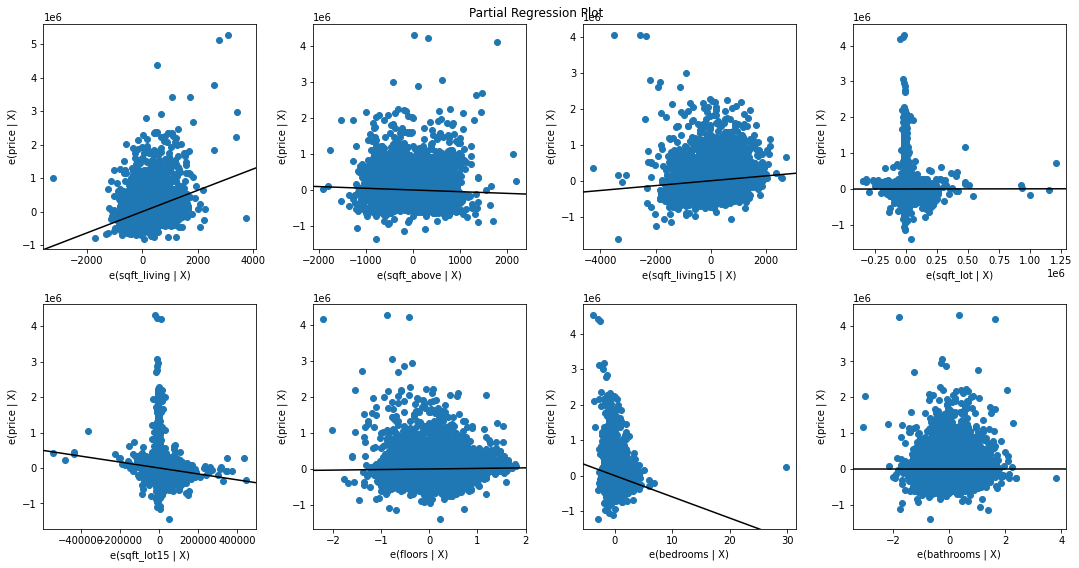

In [17]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    model,
    exog_idx=list(X_all.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

In [19]:
model.rsquared_adj

0.5209872172097507

In [18]:
#One hot encoding
#Let's handle the categorial variables

#df["view"].value_counts()
#waterfront_df = df[['waterfront']].copy()
#waterfront_df = pd.get_dummies(waterfront_df, columns=["waterfront"])
#pd.get_dummies(df, columns=["waterfront"])

# Evaluation